# Import Modules

In [61]:
# You can use any Python source file as a module by executing an import statement in some other Python source file.
# The import statement combines two operations; it searches for the named module, then it binds the
# results of that search to a name in the local scope.
import tensorflow as tf
from tensorflow import keras
import seaborn as sns

import os
import tempfile

# Use matplotlib for visualizing the model
import matplotlib as mpl
import matplotlib.pyplot as plt
# Here we'll import Pandas and Numpy data processing libraries
import numpy as np
import pandas as pd
# Use seaborn for data visualization
import seaborn as sns

# Scikit-learn is an open source machine learning library that supports supervised and unsupervised learning.
import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from jupyterthemes import jtplot
jtplot.style(theme='monokai',context='notebook',ticks=True,grid=False)
print("TensorFlow version: ",tf.version.VERSION)

TensorFlow version:  2.5.0


In [23]:
# Customize our Matplot lib visualization figure size and colors
mpl.rcParams['figure.figsize'] = (12, 10)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

# Load the DataSet

In [2]:
file = tf.keras.utils
# pandas module read_csv() function reads the CSV file into a DataFrame object.
raw_df = pd.read_csv('https://storage.googleapis.com/download.tensorflow.org/data/creditcard.csv')
# `head()` function is used to get the first n rows of dataframe
raw_df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Data Analysis

In [60]:
raw_df[['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V26', 'V27', 'V28', 'Amount', 'Class']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 11 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V26     284807 non-null  float64
 7   V27     284807 non-null  float64
 8   V28     284807 non-null  float64
 9   Amount  284807 non-null  float64
 10  Class   284807 non-null  int64  
dtypes: float64(10), int64(1)
memory usage: 23.9 MB


In [3]:
# describe() is used to view some basic statistical details
raw_df[['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V26', 'V27', 'V28', 'Amount', 'Class']].describe()

,Time,V1,V2,V3,V4,V5,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [4]:

# Numpy bincount() method is used to obtain the frequency of each element provided inside a numpy array
neg, pos = np.bincount(raw_df['Class'])
total = neg + pos
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total, pos, 100 * pos / total))

Examples:
    Total: 284807
    Positive: 492 (0.17% of total)



/home/lokesh/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Class', ylabel='count'>

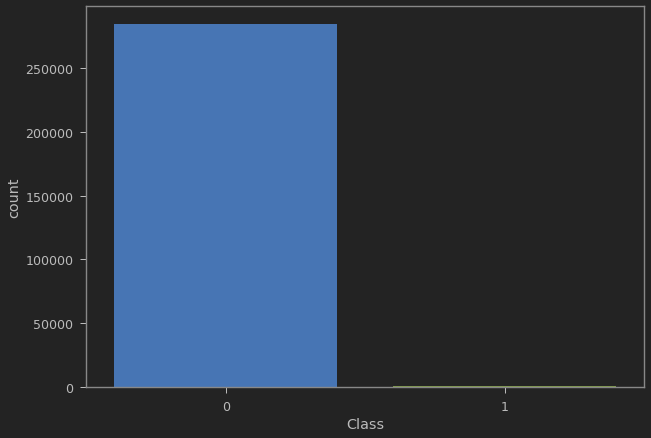

In [62]:
plt.figure(figsize=(10,7))
sns.countplot(raw_df['Class'])

# Clean The DataSet

In [5]:
cleaned_df = raw_df.copy()

# You don't want the `Time` column.
cleaned_df.pop('Time')

# The `Amount` column covers a huge range. Convert to log-space.
eps=0.001 # 0 => 0.1¢
cleaned_df['Log Ammount'] = np.log(cleaned_df.pop('Amount')+eps)

In [6]:
train_df, test_df = train_test_split(cleaned_df, test_size=0.2)
train_df, val_df = train_test_split(train_df, test_size=0.2)

# Form np arrays of labels and features.
train_labels = np.array(train_df.pop('Class'))
bool_train_labels = train_labels != 0
val_labels = np.array(val_df.pop('Class'))
test_labels = np.array(test_df.pop('Class'))

train_features = np.array(train_df)
val_features = np.array(val_df)
test_features = np.array(test_df)

In [7]:
scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)

val_features = scaler.transform(val_features)
test_features = scaler.transform(test_features)

# `np.clip()` clip (limit) the values in an array.
train_features = np.clip(train_features, -5, 5)
val_features = np.clip(val_features, -5, 5)
test_features = np.clip(test_features, -5, 5)


print('Training labels shape:', train_labels.shape)
print('Validation labels shape:', val_labels.shape)
print('Test labels shape:', test_labels.shape)

print('Training features shape:', train_features.shape)
print('Validation features shape:', val_features.shape)
print('Test features shape:', test_features.shape)

Training labels shape: (182276,)
Validation labels shape: (45569,)
Test labels shape: (56962,)
Training features shape: (182276, 29)
Validation features shape: (45569, 29)
Test features shape: (56962, 29)


/home/lokesh/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/lokesh/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


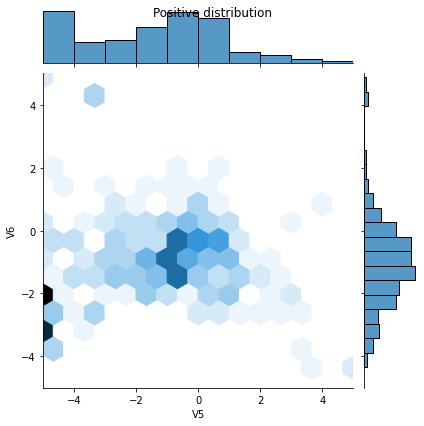

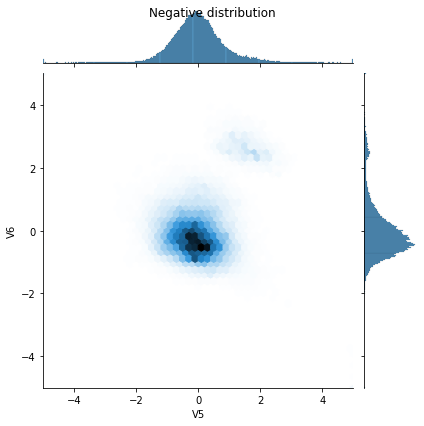

In [8]:
# pandas DataFrame is two-dimensional size-mutable, potentially heterogeneous tabular data structure with labeled axes (rows and columns)
pos_df = pd.DataFrame(train_features[ bool_train_labels], columns = train_df.columns)
neg_df = pd.DataFrame(train_features[~bool_train_labels], columns = train_df.columns)

# Seaborn’s jointplot displays a relationship between 2 variables (bivariate) as well as
sns.jointplot(pos_df['V5'], pos_df['V6'],
              kind='hex', xlim = (-5,5), ylim = (-5,5))
# The suptitle() function in pyplot module of the matplotlib library is used to add a title to the figure.
plt.suptitle("Positive distribution")

sns.jointplot(neg_df['V5'], neg_df['V6'],
              kind='hex', xlim = (-5,5), ylim = (-5,5))
_ = plt.suptitle("Negative distribution")

# Model

In [10]:
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
]

def make_model(metrics = METRICS, output_bias=None):
    if output_bias is not None:
# `tf.keras.initializers.Constant()` generates tensors with constant values.
        output_bias = tf.keras.initializers.Constant(output_bias)
# TODO 1
# Creating a Sequential model
    model = keras.Sequential([
      keras.layers.Dense(16, activation='relu',input_shape=(train_features.shape[-1],)),
      keras.layers.Dropout(0.5),
      keras.layers.Dense(1, activation='sigmoid',bias_initializer=output_bias),
  ])

# Compile the model
    model.compile(
      optimizer=keras.optimizers.Adam(lr=1e-3),
      loss=keras.losses.BinaryCrossentropy(),
      metrics=metrics)
    return model

In [11]:
EPOCHS = 100
BATCH_SIZE = 2048

# Stop training when a monitored metric has stopped improving.
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_auc', 
    verbose=1,
    patience=10,
    mode='max',
    restore_best_weights=True)

In [12]:
model = make_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                480       
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 497
Trainable params: 497
Non-trainable params: 0
_________________________________________________________________


/home/lokesh/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [13]:
# use the model to do prediction with model.predict()
model.predict(train_features[:10])

array([[0.6908729 ],
       [0.4072557 ],
       [0.48739457],
       [0.5705025 ],
       [0.54014355],
       [0.7562567 ],
       [0.6078937 ],
       [0.78796196],
       [0.5840026 ],
       [0.751215  ]], dtype=float32)

In [14]:
results = model.evaluate(train_features, train_labels, batch_size=BATCH_SIZE, verbose=0)
print("Loss: {:0.4f}".format(results[0]))

Loss: 1.0580


In [15]:
# np.log() is a mathematical function that is used to calculate the natural logarithm.
initial_bias = np.log([pos/neg])
initial_bias

array([-6.35935934])

In [16]:
model = make_model(output_bias = initial_bias)
model.predict(train_features[:10])

array([[0.00114062],
       [0.00097659],
       [0.00305918],
       [0.00682268],
       [0.00017506],
       [0.00088665],
       [0.00131246],
       [0.00118768],
       [0.00166214],
       [0.0019362 ]], dtype=float32)

In [17]:
results = model.evaluate(train_features, train_labels, batch_size=BATCH_SIZE, verbose=0)
print("Loss: {:0.4f}".format(results[0]))

Loss: 0.0125


# Loading initial weights based on class distribution

In [18]:
initial_weights = os.path.join(tempfile.mkdtemp(),'initial_weights')
model.save_weights(initial_weights)

# Train with and without initial weights

In [19]:

model = make_model()
model.load_weights(initial_weights)
model.layers[-1].bias.assign([0.0])
# Fit data to model
zero_bias_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=20,
    validation_data=(val_features, val_labels), 
    verbose=0)

In [20]:
model = make_model()
model.load_weights(initial_weights)
careful_bias_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=20,
    validation_data=(val_features, val_labels), 
    verbose=0)

In [21]:
def plot_loss(history, label, n):
  # Use a log scale to show the wide range of values.
    plt.semilogy(history.epoch,  history.history['loss'],
               color=colors[n], label='Train '+label)
    plt.semilogy(history.epoch,  history.history['val_loss'],
          color=colors[n], label='Val '+label,
          linestyle="--")
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

# Results

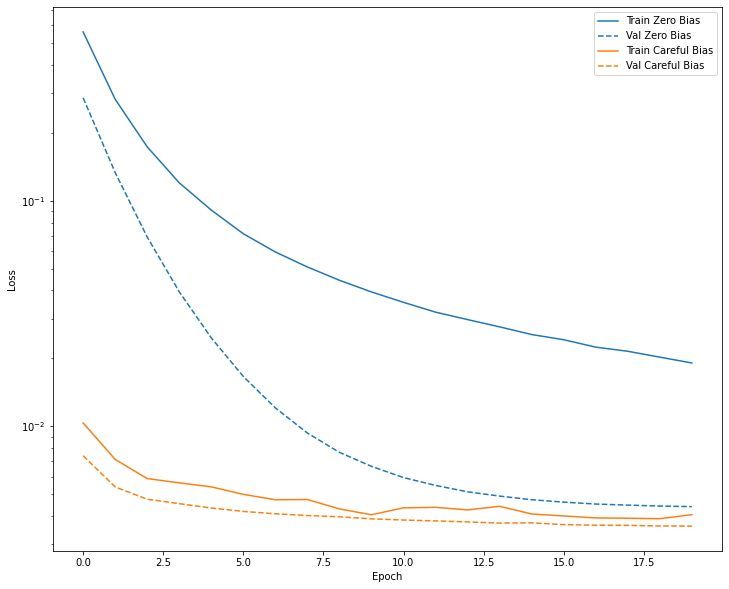

In [24]:
plot_loss(zero_bias_history, "Zero Bias", 0)
plot_loss(careful_bias_history, "Careful Bias", 1)

# Training

In [25]:
model = make_model()
model.load_weights(initial_weights)
# Fit data to model
baseline_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks = [early_stopping],
    validation_data=(val_features, val_labels))

Epoch 1/100
90/90 [==============================] - 2s 12ms/step - loss: 0.0106 - tp: 103.0000 - fp: 24.0000 - tn: 227430.0000 - fn: 288.0000 - accuracy: 0.9986 - precision: 0.8110 - recall: 0.2634 - auc: 0.7756 - val_loss: 0.0078 - val_tp: 24.0000 - val_fp: 2.0000 - val_tn: 45475.0000 - val_fn: 68.0000 - val_accuracy: 0.9985 - val_precision: 0.9231 - val_recall: 0.2609 - val_auc: 0.8960
Epoch 2/100
90/90 [==============================] - 1s 7ms/step - loss: 0.0074 - tp: 96.0000 - fp: 14.0000 - tn: 181963.0000 - fn: 203.0000 - accuracy: 0.9988 - precision: 0.8727 - recall: 0.3211 - auc: 0.8578 - val_loss: 0.0054 - val_tp: 44.0000 - val_fp: 6.0000 - val_tn: 45471.0000 - val_fn: 48.0000 - val_accuracy: 0.9988 - val_precision: 0.8800 - val_recall: 0.4783 - val_auc: 0.9126
Epoch 3/100
90/90 [==============================] - 1s 7ms/step - loss: 0.0059 - tp: 131.0000 - fp: 24.0000 - tn: 181953.0000 - fn: 168.0000 - accuracy: 0.9989 - precision: 0.8452 - recall: 0.4381 - auc: 0.9025 - val_

Epoch 22/100
90/90 [==============================] - 1s 6ms/step - loss: 0.0039 - tp: 182.0000 - fp: 31.0000 - tn: 181946.0000 - fn: 117.0000 - accuracy: 0.9992 - precision: 0.8545 - recall: 0.6087 - auc: 0.9273 - val_loss: 0.0036 - val_tp: 72.0000 - val_fp: 9.0000 - val_tn: 45468.0000 - val_fn: 20.0000 - val_accuracy: 0.9994 - val_precision: 0.8889 - val_recall: 0.7826 - val_auc: 0.9398
Epoch 23/100
90/90 [==============================] - 1s 6ms/step - loss: 0.0040 - tp: 168.0000 - fp: 36.0000 - tn: 181941.0000 - fn: 131.0000 - accuracy: 0.9991 - precision: 0.8235 - recall: 0.5619 - auc: 0.9288 - val_loss: 0.0036 - val_tp: 73.0000 - val_fp: 9.0000 - val_tn: 45468.0000 - val_fn: 19.0000 - val_accuracy: 0.9994 - val_precision: 0.8902 - val_recall: 0.7935 - val_auc: 0.9399
Epoch 24/100
90/90 [==============================] - 0s 5ms/step - loss: 0.0037 - tp: 185.0000 - fp: 24.0000 - tn: 181953.0000 - fn: 114.0000 - accuracy: 0.9992 - precision: 0.8852 - recall: 0.6187 - auc: 0.9339 - v

Epoch 43/100
90/90 [==============================] - 1s 8ms/step - loss: 0.0037 - tp: 178.0000 - fp: 32.0000 - tn: 181945.0000 - fn: 121.0000 - accuracy: 0.9992 - precision: 0.8476 - recall: 0.5953 - auc: 0.9323 - val_loss: 0.0037 - val_tp: 68.0000 - val_fp: 7.0000 - val_tn: 45470.0000 - val_fn: 24.0000 - val_accuracy: 0.9993 - val_precision: 0.9067 - val_recall: 0.7391 - val_auc: 0.9453
Epoch 44/100
90/90 [==============================] - 1s 7ms/step - loss: 0.0035 - tp: 188.0000 - fp: 22.0000 - tn: 181955.0000 - fn: 111.0000 - accuracy: 0.9993 - precision: 0.8952 - recall: 0.6288 - auc: 0.9290 - val_loss: 0.0037 - val_tp: 65.0000 - val_fp: 7.0000 - val_tn: 45470.0000 - val_fn: 27.0000 - val_accuracy: 0.9993 - val_precision: 0.9028 - val_recall: 0.7065 - val_auc: 0.9452
Epoch 45/100
90/90 [==============================] - 1s 7ms/step - loss: 0.0035 - tp: 182.0000 - fp: 32.0000 - tn: 181945.0000 - fn: 117.0000 - accuracy: 0.9992 - precision: 0.8505 - recall: 0.6087 - auc: 0.9457 - v

In [27]:
def plot_metrics(history):
    metrics =  ['loss', 'auc', 'precision', 'recall']
    for n, metric in enumerate(metrics):
        name = metric.replace("_"," ").capitalize()
# subplots() which acts as a utility wrapper and helps in creating common layouts of subplots
        plt.subplot(2,2,n+1)
        plt.plot(history.epoch,  history.history[metric], color=colors[0], label='Train')
        plt.plot(history.epoch, history.history['val_'+metric],
             color=colors[0], linestyle="--", label='Val')
        plt.xlabel('Epoch')
        plt.ylabel(name)
        if metric == 'loss':
            plt.ylim([0, plt.ylim()[1]])
        elif metric == 'auc':
            plt.ylim([0.8,1])
        else:
            plt.ylim([0,1])
        plt.legend()

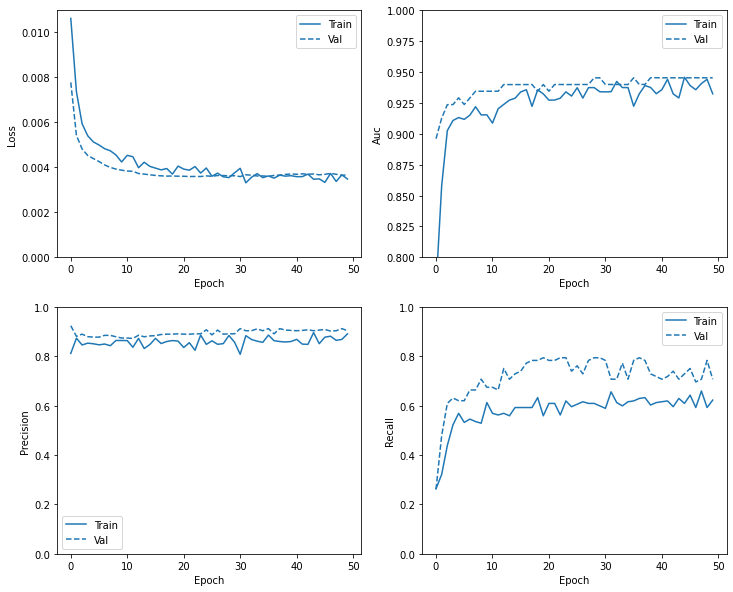

In [28]:
plot_metrics(baseline_history)

# Evaluating the model performance

In [31]:
train_predictions_baseline = model.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_baseline = model.predict(test_features, batch_size=BATCH_SIZE)

In [29]:
def plot_cm(labels, predictions, p=0.5):
    cm = confusion_matrix(labels, predictions > p)
    plt.figure(figsize=(5,5))
    sns.heatmap(cm, annot=True, fmt="d")
    plt.title('Confusion matrix @{:.2f}'.format(p))
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    print('Legitimate Transactions Detected (True Negatives): ', cm[0][0])
    print('Legitimate Transactions Incorrectly Detected (False Positives): ', cm[0][1])
    print('Fraudulent Transactions Missed (False Negatives): ', cm[1][0])
    print('Fraudulent Transactions Detected (True Positives): ', cm[1][1])
    print('Total Fraudulent Transactions: ', np.sum(cm[1]))

loss :  0.0027114867698401213
tp :  75.0
fp :  9.0
tn :  56852.0
fn :  26.0
accuracy :  0.9993855357170105
precision :  0.8928571343421936
recall :  0.7425742745399475
auc :  0.9403902292251587

Legitimate Transactions Detected (True Negatives):  56852
Legitimate Transactions Incorrectly Detected (False Positives):  9
Fraudulent Transactions Missed (False Negatives):  26
Fraudulent Transactions Detected (True Positives):  75
Total Fraudulent Transactions:  101


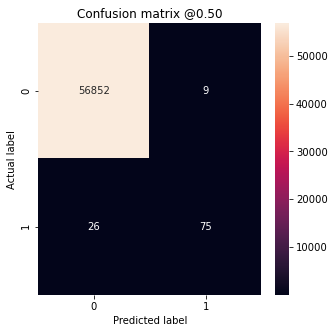

In [32]:
baseline_results = model.evaluate(test_features, test_labels,
                                  batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(model.metrics_names, baseline_results):
    print(name, ': ', value)
print()

plot_cm(test_labels, test_predictions_baseline)

In [33]:
def plot_roc(name, labels, predictions, **kwargs):
# Plot Receiver operating characteristic (ROC) curve.
    fp, tp, _ = sklearn.metrics.roc_curve(labels, predictions)
    plt.plot(100*fp, 100*tp, label=name, linewidth=2, **kwargs)
    plt.xlabel('False positives [%]')
    plt.ylabel('True positives [%]')
    plt.xlim([-0.5,20])
    plt.ylim([80,100.5])
    plt.grid(True)
    ax = plt.gca()
    ax.set_aspect('equal')

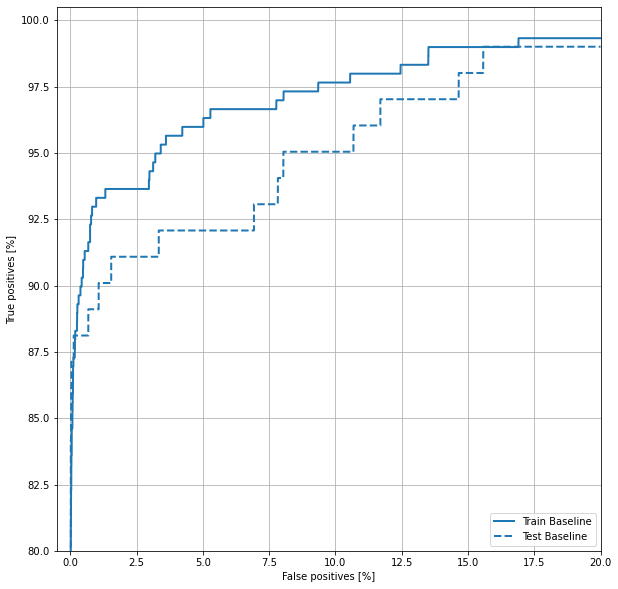

In [34]:
plot_roc("Train Baseline", train_labels, train_predictions_baseline, color=colors[0])
plot_roc("Test Baseline", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')
plt.legend(loc='lower right')

# Model with inital weights + class weights

In [35]:
weight_for_0 = (1 / neg)*(total)/2.0 
weight_for_1 = (1 / pos)*(total)/2.0

class_weight = {0: weight_for_0, 1: weight_for_1}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))

Weight for class 0: 0.50
Weight for class 1: 289.44


In [36]:
weighted_model = make_model()
weighted_model.load_weights(initial_weights)

weighted_history = weighted_model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks = [early_stopping],
    validation_data=(val_features, val_labels),
    # The class weights go here
    class_weight=class_weight)

Instructions for updating:
The `validate_indices` argument has no effect. Indices are always validated on CPU and never validated on GPU.


/home/lokesh/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/100
90/90 [==============================] - 3s 14ms/step - loss: 1.8836 - tp: 135.0000 - fp: 83.0000 - tn: 238755.0000 - fn: 265.0000 - accuracy: 0.9985 - precision: 0.6193 - recall: 0.3375 - auc: 0.8182 - val_loss: 0.0081 - val_tp: 34.0000 - val_fp: 3.0000 - val_tn: 45474.0000 - val_fn: 58.0000 - val_accuracy: 0.9987 - val_precision: 0.9189 - val_recall: 0.3696 - val_auc: 0.9040
Epoch 2/100
90/90 [==============================] - 1s 8ms/step - loss: 1.0145 - tp: 146.0000 - fp: 247.0000 - tn: 181730.0000 - fn: 153.0000 - accuracy: 0.9978 - precision: 0.3715 - recall: 0.4883 - auc: 0.8755 - val_loss: 0.0087 - val_tp: 65.0000 - val_fp: 13.0000 - val_tn: 45464.0000 - val_fn: 27.0000 - val_accuracy: 0.9991 - val_precision: 0.8333 - val_recall: 0.7065 - val_auc: 0.9448
Epoch 3/100
90/90 [==============================] - 1s 8ms/step - loss: 0.5879 - tp: 196.0000 - fp: 680.0000 - tn: 181297.0000 - fn: 103.0000 - accuracy: 0.9957 - precision: 0.2237 - recall: 0.6555 - auc: 0.9394 - 

Epoch 22/100
90/90 [==============================] - 1s 6ms/step - loss: 0.1753 - tp: 271.0000 - fp: 6615.0000 - tn: 175362.0000 - fn: 28.0000 - accuracy: 0.9636 - precision: 0.0394 - recall: 0.9064 - auc: 0.9800 - val_loss: 0.0819 - val_tp: 83.0000 - val_fp: 868.0000 - val_tn: 44609.0000 - val_fn: 9.0000 - val_accuracy: 0.9808 - val_precision: 0.0873 - val_recall: 0.9022 - val_auc: 0.9722
Epoch 23/100
90/90 [==============================] - 1s 6ms/step - loss: 0.1725 - tp: 274.0000 - fp: 6212.0000 - tn: 175765.0000 - fn: 25.0000 - accuracy: 0.9658 - precision: 0.0422 - recall: 0.9164 - auc: 0.9785 - val_loss: 0.0751 - val_tp: 82.0000 - val_fp: 788.0000 - val_tn: 44689.0000 - val_fn: 10.0000 - val_accuracy: 0.9825 - val_precision: 0.0943 - val_recall: 0.8913 - val_auc: 0.9717
Epoch 24/100
90/90 [==============================] - 1s 6ms/step - loss: 0.2033 - tp: 265.0000 - fp: 5915.0000 - tn: 176062.0000 - fn: 34.0000 - accuracy: 0.9674 - precision: 0.0429 - recall: 0.8863 - auc: 0.97

Epoch 43/100
90/90 [==============================] - 1s 9ms/step - loss: 0.1653 - tp: 275.0000 - fp: 5580.0000 - tn: 176397.0000 - fn: 24.0000 - accuracy: 0.9693 - precision: 0.0470 - recall: 0.9197 - auc: 0.9775 - val_loss: 0.0716 - val_tp: 82.0000 - val_fp: 728.0000 - val_tn: 44749.0000 - val_fn: 10.0000 - val_accuracy: 0.9838 - val_precision: 0.1012 - val_recall: 0.8913 - val_auc: 0.9738
Epoch 44/100
90/90 [==============================] - 1s 9ms/step - loss: 0.1952 - tp: 267.0000 - fp: 5760.0000 - tn: 176217.0000 - fn: 32.0000 - accuracy: 0.9682 - precision: 0.0443 - recall: 0.8930 - auc: 0.9747 - val_loss: 0.0793 - val_tp: 82.0000 - val_fp: 825.0000 - val_tn: 44652.0000 - val_fn: 10.0000 - val_accuracy: 0.9817 - val_precision: 0.0904 - val_recall: 0.8913 - val_auc: 0.9731
Epoch 45/100
90/90 [==============================] - 1s 7ms/step - loss: 0.1635 - tp: 274.0000 - fp: 5728.0000 - tn: 176249.0000 - fn: 25.0000 - accuracy: 0.9684 - precision: 0.0457 - recall: 0.9164 - auc: 0.9

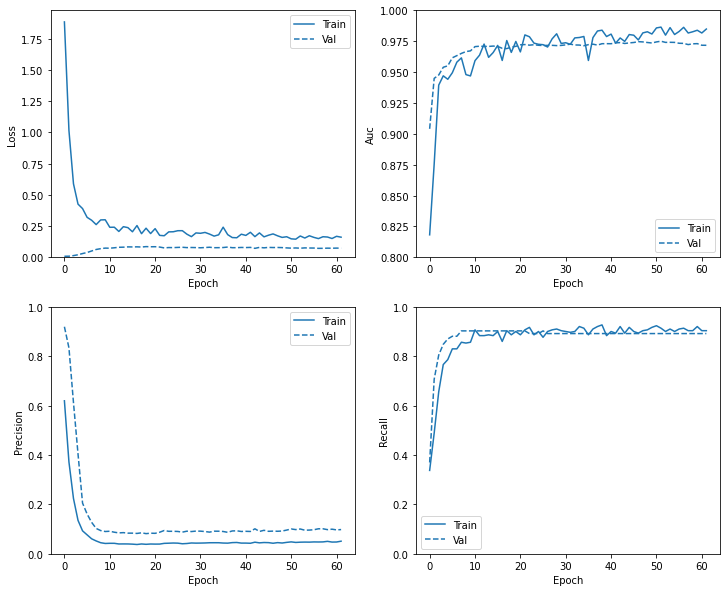

In [37]:
plot_metrics(weighted_history)

# Evaluating the model performance

In [38]:
train_predictions_weighted = weighted_model.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_weighted = weighted_model.predict(test_features, batch_size=BATCH_SIZE)

loss :  0.07134715467691422
tp :  92.0
fp :  921.0
tn :  55940.0
fn :  9.0
accuracy :  0.9836733341217041
precision :  0.090819351375103
recall :  0.9108911156654358
auc :  0.9893181920051575

Legitimate Transactions Detected (True Negatives):  55940
Legitimate Transactions Incorrectly Detected (False Positives):  921
Fraudulent Transactions Missed (False Negatives):  9
Fraudulent Transactions Detected (True Positives):  92
Total Fraudulent Transactions:  101


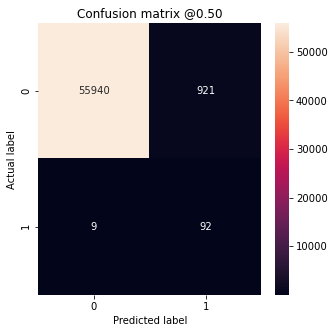

In [39]:
weighted_results = weighted_model.evaluate(test_features, test_labels,
                                           batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(weighted_model.metrics_names, weighted_results):
    print(name, ': ', value)
print()

plot_cm(test_labels, test_predictions_weighted)

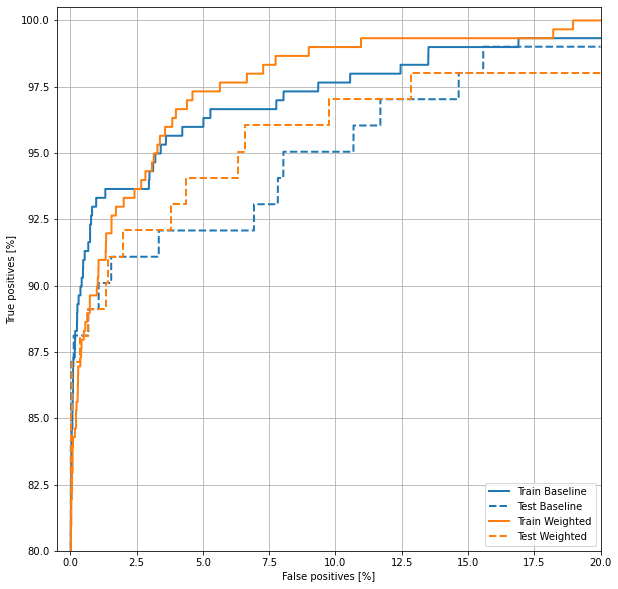

In [40]:
plot_roc("Train Baseline", train_labels, train_predictions_baseline, color=colors[0])
plot_roc("Test Baseline", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')

plot_roc("Train Weighted", train_labels, train_predictions_weighted, color=colors[1])
plot_roc("Test Weighted", test_labels, test_predictions_weighted, color=colors[1], linestyle='--')


# Function legend() which is used to Place a legend on the axes
plt.legend(loc='lower right')

# Oversampling

In [41]:
pos_features = train_features[bool_train_labels]
neg_features = train_features[~bool_train_labels]

pos_labels = train_labels[bool_train_labels]
neg_labels = train_labels[~bool_train_labels]

## using numpy

In [42]:
# np.arange() return evenly spaced values within a given interval.
ids = np.arange(len(pos_features))
# choice() method, you can get the random samples of one dimensional array and return the random samples of numpy array.
choices = np.random.choice(ids, len(neg_features))

res_pos_features = pos_features[choices]
res_pos_labels = pos_labels[choices]

res_pos_features.shape

(181977, 29)

In [43]:
# numpy.concatenate() function concatenate a sequence of arrays along an existing axis.
resampled_features = np.concatenate([res_pos_features, neg_features], axis=0)
resampled_labels = np.concatenate([res_pos_labels, neg_labels], axis=0)

order = np.arange(len(resampled_labels))
# numpy.random.shuffle() modify a sequence in-place by shuffling its contents.
np.random.shuffle(order)
resampled_features = resampled_features[order]
resampled_labels = resampled_labels[order]

resampled_features.shape

(363954, 29)

# Using tf.data

In [44]:
BUFFER_SIZE = 100000

def make_ds(features, labels):
# With the help of tf.data.Dataset.from_tensor_slices() method, we can get the slices of an array in the form of objects
# by using tf.data.Dataset.from_tensor_slices() method.
    ds = tf.data.Dataset.from_tensor_slices((features, labels))#.cache()
    ds = ds.shuffle(BUFFER_SIZE).repeat()
    return ds

pos_ds = make_ds(pos_features, pos_labels)
neg_ds = make_ds(neg_features, neg_labels)

In [45]:
for features, label in pos_ds.take(1):
    print("Features:\n", features.numpy())
    print()
    print("Label: ", label.numpy())

Features:
 [ 0.55448889  0.5899518  -0.18499759  1.93942557  0.30010989 -0.24080677
  0.03235008  0.14867317 -0.88265711 -0.17871684  2.10165847 -0.27734194
 -1.19617413 -1.97069655  0.4369202   1.56305417  1.79928249  1.22587577
 -1.93895878 -0.22211001 -0.01513142 -0.07903933 -0.08801666 -0.04390758
  0.77123788  0.15043914  0.06800825  0.19801549 -4.86853476]

Label:  1


In [46]:
resampled_ds = tf.data.experimental.sample_from_datasets([pos_ds, neg_ds], weights=[0.5, 0.5])
resampled_ds = resampled_ds.batch(BATCH_SIZE).prefetch(2)

In [47]:
for features, label in resampled_ds.take(1):
    print(label.numpy().mean())

0.5146484375


In [48]:
# `np.ceil()` function returns the ceil value of the input array elements
resampled_steps_per_epoch = np.ceil(2.0*neg/BATCH_SIZE)
resampled_steps_per_epoch

278.0

In [49]:
resampled_model = make_model()
resampled_model.load_weights(initial_weights)

# Reset the bias to zero, since this dataset is balanced.
output_layer = resampled_model.layers[-1] 
output_layer.bias.assign([0])

val_ds = tf.data.Dataset.from_tensor_slices((val_features, val_labels)).cache()
val_ds = val_ds.batch(BATCH_SIZE).prefetch(2) 

resampled_history = resampled_model.fit(
    resampled_ds,
    epochs=EPOCHS,
    steps_per_epoch=resampled_steps_per_epoch,
    callbacks = [early_stopping],
    validation_data=val_ds)

/home/lokesh/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/100
278/278 [==============================] - 10s 33ms/step - loss: 0.3930 - tp: 244469.0000 - fp: 68234.0000 - tn: 273245.0000 - fn: 40358.0000 - accuracy: 0.8266 - precision: 0.7818 - recall: 0.8583 - auc: 0.9199 - val_loss: 0.2269 - val_tp: 83.0000 - val_fp: 1218.0000 - val_tn: 44259.0000 - val_fn: 9.0000 - val_accuracy: 0.9731 - val_precision: 0.0638 - val_recall: 0.9022 - val_auc: 0.9612
Epoch 2/100
278/278 [==============================] - 8s 30ms/step - loss: 0.1944 - tp: 261886.0000 - fp: 16347.0000 - tn: 267981.0000 - fn: 23130.0000 - accuracy: 0.9307 - precision: 0.9412 - recall: 0.9188 - auc: 0.9769 - val_loss: 0.1199 - val_tp: 83.0000 - val_fp: 879.0000 - val_tn: 44598.0000 - val_fn: 9.0000 - val_accuracy: 0.9805 - val_precision: 0.0863 - val_recall: 0.9022 - val_auc: 0.9687
Epoch 3/100
278/278 [==============================] - 7s 25ms/step - loss: 0.1497 - tp: 265009.0000 - fp: 10958.0000 - tn: 273865.0000 - fn: 19512.0000 - accuracy: 0.9465 - precision: 0.9603 

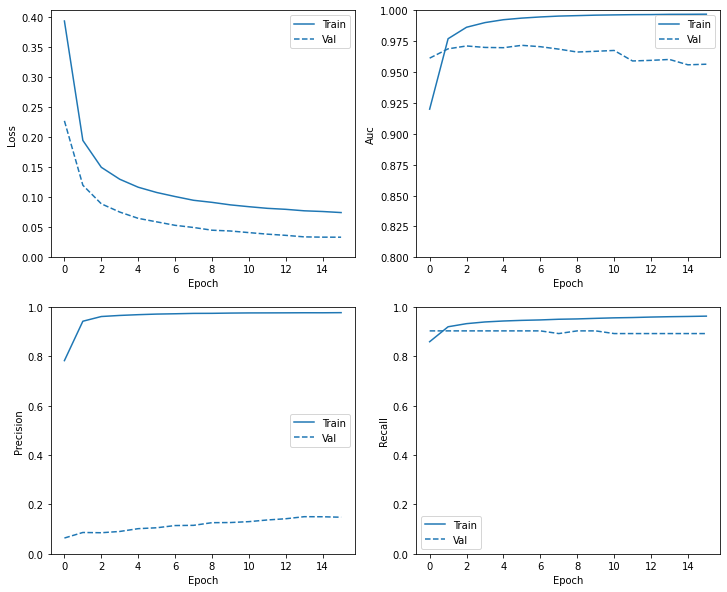

In [54]:
plot_metrics(resampled_history )

# Re-train
Because training is easier on the balanced data, the above training procedure may overfit quickly.

So break up the epochs to give the callbacks.EarlyStopping finer control over when to stop training.

In [55]:
resampled_model = make_model()
resampled_model.load_weights(initial_weights)

# Reset the bias to zero, since this dataset is balanced.
output_layer = resampled_model.layers[-1] 
output_layer.bias.assign([0])

resampled_history = resampled_model.fit(
    resampled_ds,
    # These are not real epochs
    steps_per_epoch = 20,
    epochs=10*EPOCHS,
    callbacks = [early_stopping],
    validation_data=(val_ds))

Epoch 1/1000
20/20 [==============================] - 2s 60ms/step - loss: 0.8158 - tp: 12775.0000 - fp: 10743.0000 - tn: 55140.0000 - fn: 7871.0000 - accuracy: 0.7849 - precision: 0.5432 - recall: 0.6188 - auc: 0.8717 - val_loss: 0.7055 - val_tp: 80.0000 - val_fp: 22020.0000 - val_tn: 23457.0000 - val_fn: 12.0000 - val_accuracy: 0.5165 - val_precision: 0.0036 - val_recall: 0.8696 - val_auc: 0.8349
Epoch 2/1000
20/20 [==============================] - 1s 34ms/step - loss: 0.6054 - tp: 15702.0000 - fp: 9748.0000 - tn: 10966.0000 - fn: 4544.0000 - accuracy: 0.6511 - precision: 0.6170 - recall: 0.7756 - auc: 0.7789 - val_loss: 0.6502 - val_tp: 84.0000 - val_fp: 18395.0000 - val_tn: 27082.0000 - val_fn: 8.0000 - val_accuracy: 0.5962 - val_precision: 0.0045 - val_recall: 0.9130 - val_auc: 0.9053
Epoch 3/1000
20/20 [==============================] - 1s 35ms/step - loss: 0.5165 - tp: 17076.0000 - fp: 8376.0000 - tn: 12130.0000 - fn: 3378.0000 - accuracy: 0.7130 - precision: 0.6709 - recall: 0

20/20 [==============================] - 1s 55ms/step - loss: 0.1914 - tp: 18844.0000 - fp: 1119.0000 - tn: 19372.0000 - fn: 1625.0000 - accuracy: 0.9330 - precision: 0.9439 - recall: 0.9206 - auc: 0.9773 - val_loss: 0.1555 - val_tp: 83.0000 - val_fp: 987.0000 - val_tn: 44490.0000 - val_fn: 9.0000 - val_accuracy: 0.9781 - val_precision: 0.0776 - val_recall: 0.9022 - val_auc: 0.9662
Epoch 22/1000
20/20 [==============================] - 1s 36ms/step - loss: 0.1881 - tp: 18827.0000 - fp: 1120.0000 - tn: 19394.0000 - fn: 1619.0000 - accuracy: 0.9331 - precision: 0.9439 - recall: 0.9208 - auc: 0.9781 - val_loss: 0.1491 - val_tp: 83.0000 - val_fp: 961.0000 - val_tn: 44516.0000 - val_fn: 9.0000 - val_accuracy: 0.9787 - val_precision: 0.0795 - val_recall: 0.9022 - val_auc: 0.9668
Epoch 23/1000
20/20 [==============================] - 1s 47ms/step - loss: 0.1842 - tp: 19013.0000 - fp: 1014.0000 - tn: 19276.0000 - fn: 1657.0000 - accuracy: 0.9348 - precision: 0.9494 - recall: 0.9198 - auc: 0.97

Epoch 42/1000
20/20 [==============================] - 1s 34ms/step - loss: 0.1374 - tp: 19002.0000 - fp: 706.0000 - tn: 19921.0000 - fn: 1331.0000 - accuracy: 0.9503 - precision: 0.9642 - recall: 0.9345 - auc: 0.9884 - val_loss: 0.0868 - val_tp: 82.0000 - val_fp: 822.0000 - val_tn: 44655.0000 - val_fn: 10.0000 - val_accuracy: 0.9817 - val_precision: 0.0907 - val_recall: 0.8913 - val_auc: 0.9707
Epoch 43/1000
20/20 [==============================] - 1s 33ms/step - loss: 0.1375 - tp: 19117.0000 - fp: 699.0000 - tn: 19770.0000 - fn: 1374.0000 - accuracy: 0.9494 - precision: 0.9647 - recall: 0.9329 - auc: 0.9884 - val_loss: 0.0857 - val_tp: 82.0000 - val_fp: 827.0000 - val_tn: 44650.0000 - val_fn: 10.0000 - val_accuracy: 0.9816 - val_precision: 0.0902 - val_recall: 0.8913 - val_auc: 0.9707
Epoch 44/1000
20/20 [==============================] - 1s 33ms/step - loss: 0.1358 - tp: 19264.0000 - fp: 661.0000 - tn: 19696.0000 - fn: 1339.0000 - accuracy: 0.9512 - precision: 0.9668 - recall: 0.935

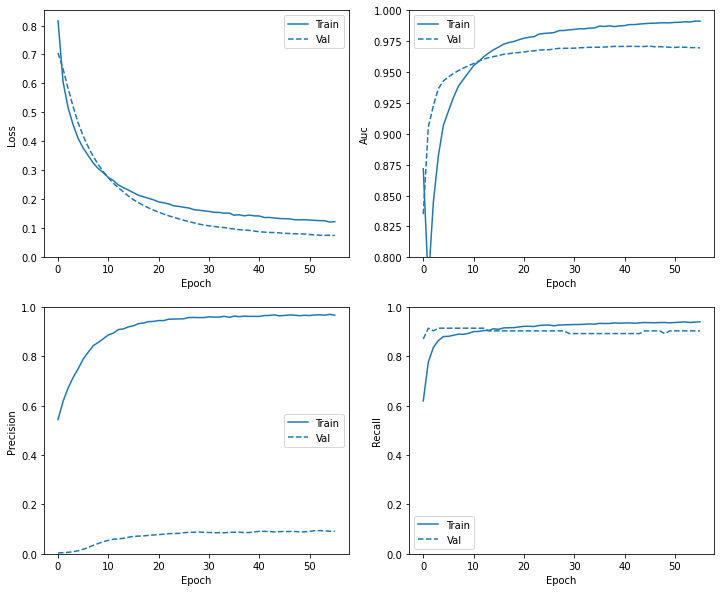

In [56]:
plot_metrics(resampled_history)

In [57]:
train_predictions_resampled = resampled_model.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_resampled = resampled_model.predict(test_features, batch_size=BATCH_SIZE)

loss :  0.0803845077753067
tp :  92.0
fp :  1048.0
tn :  55813.0
fn :  9.0
accuracy :  0.9814437627792358
precision :  0.08070175349712372
recall :  0.9108911156654358
auc :  0.9872053861618042

Legitimate Transactions Detected (True Negatives):  55813
Legitimate Transactions Incorrectly Detected (False Positives):  1048
Fraudulent Transactions Missed (False Negatives):  9
Fraudulent Transactions Detected (True Positives):  92
Total Fraudulent Transactions:  101


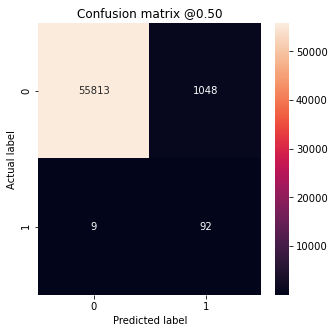

In [58]:
resampled_results = resampled_model.evaluate(test_features, test_labels,
                                             batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(resampled_model.metrics_names, resampled_results):
    print(name, ': ', value)
print()

plot_cm(test_labels, test_predictions_resampled)

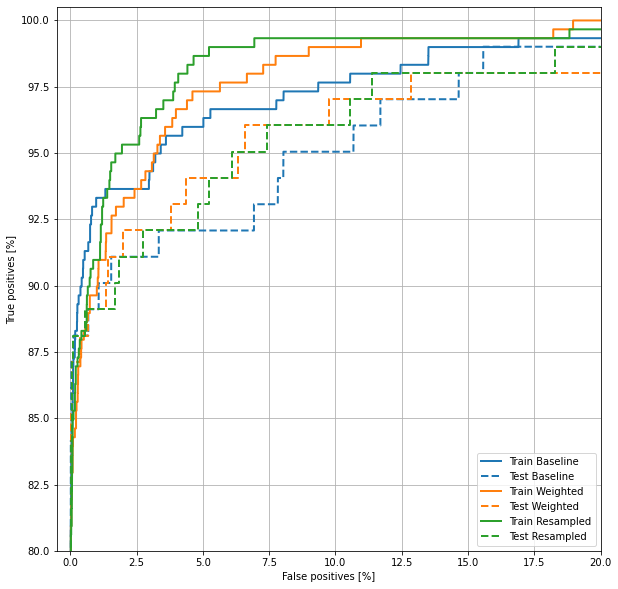

In [59]:
plot_roc("Train Baseline", train_labels, train_predictions_baseline, color=colors[0])
plot_roc("Test Baseline", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')

plot_roc("Train Weighted", train_labels, train_predictions_weighted, color=colors[1])
plot_roc("Test Weighted", test_labels, test_predictions_weighted, color=colors[1], linestyle='--')

plot_roc("Train Resampled", train_labels, train_predictions_resampled,  color=colors[2])
plot_roc("Test Resampled", test_labels, test_predictions_resampled,  color=colors[2], linestyle='--')
plt.legend(loc='lower right')